<a href="https://colab.research.google.com/github/gilesitorr/Estadistica_Avanzada/blob/main/Parcial_2/Tarea_3/EA_parcial2_tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Estadística Avanzada__
# Parcial 2 - Tarea 3
## _Gil Estéfano Rodríguez Rivera_

Todas las bases de datos utilizadas así como el desarrollo se encuentra en _GitHub_ en https://github.com/gilesitorr/Estadistica_Avanzada/tree/main/Parcial_2/Tarea_3

__Nota:__ En este Notebook se usó el kernel de R, aunque la extensión sea ipynb.

In [85]:
# Antes de comenzar, se importan las librerías a usar
library(dplyr)

## Biostatistics: A Foundation for Analysis in the Health Sciences
### Wayne W. Daniel & Chad L. Cross

### 11.2.1


__For subjects undergoing stem cell transplants, dendritic cells (DCs) are antigen-presenting cells that are critical to the generation of immunologic tumor responses. Bolwell et al. (A-2) studied lymphoid DCs in 44 subjects who underwent autologous stem cell transplantation. The outcome variable is the concentration of DC2 cells as measured by flow cytometry. One of the independent variables is the age of the subject (years), and the second independent variable is the mobilization method. During chemotherapy, 11 subjects received granulocyte colony-stimulating factor (G-CSF) mobilizer (mg/kg/day) and 33 received etoposide (2 g=m2). The mobilizer is a kind of blood progenitor cell that triggers the formation of the DC cells. The results were as follows:__

(a) Draw a scatter diagram of the data using different symbols for the different categorical variables.

(b) Use dummy variable coding and regression to analyze the data.

(c) Perform appropriate hypothesis tests and construct appropriate confidence intervals using your choice of significance and confidence levels.

(d) Find the p value for each test that you perform.

In [86]:
# Se define el url donde está guardado el archivo csv a usar
url = "https://github.com/gilesitorr/Estadistica_Avanzada/raw/main/Parcial_2/Tarea_3/EXR_C11_S02_01.csv"

# Se lee el archivo csv desde el url que se definió
df <- read.csv(url, header=TRUE)

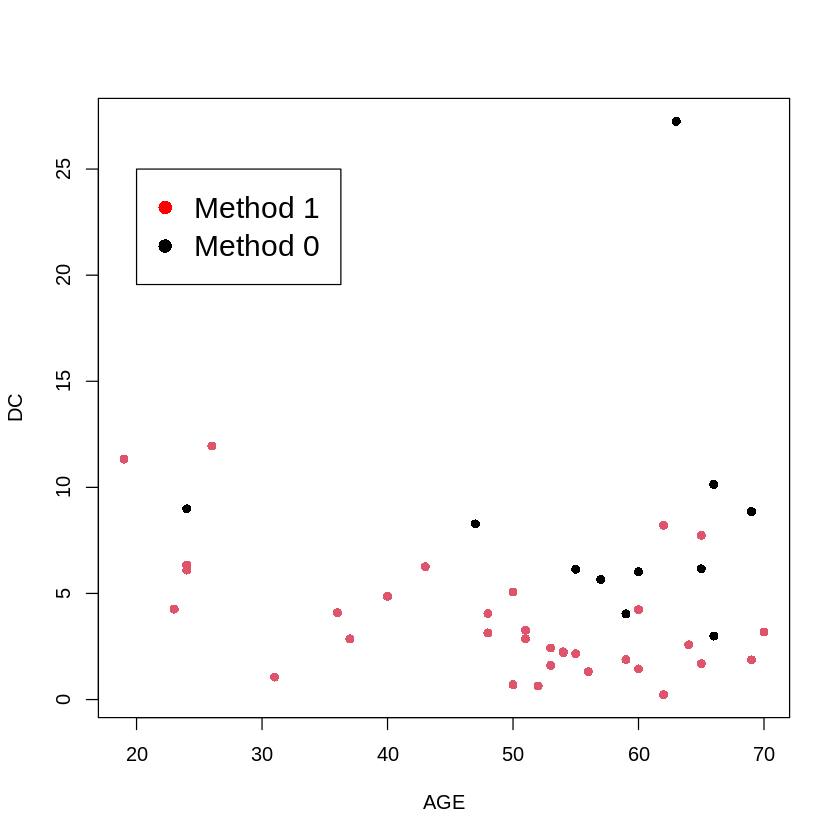

In [87]:
# Se codifica como dummy variable el método
# NOTA
# G-CSF es el método METHOD=0
# El métoco METHOD=1 corresponde a Etoposide
df$METHOD.1 <- as.factor(df$METHOD)

# Se hace la gráfica y se pone un color distinto para cada método
with(df, plot(AGE, DC, col = METHOD.1, pch=16))
legend(20, 25, legend=c("Method 1", "Method 0"),
       col=c("red", "black"), pch=c(16,16), cex=1.5)

In [88]:
# Se realiza la regresión lineal
ajuste <- lm(DC~AGE+METHOD.1, data=df)

In [90]:
# Se muestra la pruba t de los coeficientes
summary(ajuste)


Call:
lm(formula = DC ~ AGE + METHOD.1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9503 -1.8686 -0.9299  0.7822 19.0828 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.93349    2.78660   4.641 3.53e-05 ***
AGE         -0.07566    0.04388  -1.724 0.092217 .  
METHOD.11   -5.47993    1.42945  -3.834 0.000427 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.965 on 41 degrees of freedom
Multiple R-squared:  0.2713,	Adjusted R-squared:  0.2358 
F-statistic: 7.633 on 2 and 41 DF,  p-value: 0.00152


Se realizó una prueba ANOVA sobre todos los coeficientes de la regresión con una significancia de 0.05. Como puede verse en la celda anterior en la sección _F-statistic_, el p-value de la prueba es de 0.0152, que es menor a 0.05, por lo que puede inferirse que, con un 95% de confianza, al menos uno de los coeficientes de la regresión es diferente de cero.

Para dar continuidad al resultado anterior, se realizó una prueba t bilateral sobre cada coeficiente de la regresión con una significancia de 0.05. Como puede verse, todos los p-values de la tabla _Coefficients_ en la celda anterior son menores a 0.025, por lo que puede inferirse que, con un 95% de confianza, cada uno de los coeficientes es, individualmente, diferente de cero.

In [91]:
# Se calcula el intervalo de confianza del 95% del ajuste 0
confint(ajuste, level=0.95)

,2.5 %,97.5 %
(Intercept),7.3058318,18.56114449
AGE,-0.1642726,0.01296244
METHOD.11,-8.3667560,-2.59310908


Para concluir el análisis de la regresión, se calcularon los intervalos de confianza del 95% de cada uno de los coeficientes de la regresión. Estos coeficientes se muestran en la tabla de la celda anterior. Es justo notar que, efectivamente, ninguno de los intervalos contiene a 0.

### 11.3.1


__Refer to the data of Exercise 10.3.2 reported by Son et al. (A-6), who studied family caregiving in Korea of older adults with dementia. The outcome variable, caregiver burden (BURDEN), was measured by the Korean Burden Inventory (KBI) where scores ranged from 28 to 140 with higher scores indicating higher burden. Perform a stepwise regression analysis on the following independent variables reported by the researchers:__

CGAGE: caregiver age (years)

CGINCOME: caregiver income (Won-Korean currency)

CGDUR: caregiver-duration of caregiving (month)

ADL: total activities of daily living where low scores indicate the elderly perform activities independently.

MEM: memory and behavioral problems with higher scores indicating more problems.

COG: cognitive impairment with lower scores indicating a greater degree of cognitive impairment.

SOCIALSU: total score of perceived social support (25–175, higher values indicating more support).

__The reported data are as follows.__

In [7]:
# Se define el url donde está guardado el archivo csv a usar
url = "https://github.com/gilesitorr/Estadistica_Avanzada/raw/main/Parcial_2/Tarea_3/EXR_C11_S03_01.csv"

# Se lee el archivo csv desde el url que se definió
df <- read.csv(url, header=TRUE)

In [13]:
# Se define el modelo donde sólo se ajusta la intersección de la recta
interseccion <- lm(BURDEN ~ 1, data=df)

# Se define el modelo donde se consideran todas las variables independientes
completo <- lm(BURDEN ~ ., data=df)

# Se hace regresión stepwise con la función "step" de R
stepwise <- step(intercept_only, direction='both', scope=formula(all), trace=0)

In [14]:
# Se hace el resumen
summary(stepwise)


Call:
lm(formula = BURDEN ~ MEM + SOCIALSU + CGDUR, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.672  -9.977   0.367   7.774  31.523 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 115.53922   12.36816   9.342 3.86e-15 ***
MEM           0.56612    0.10232   5.533 2.73e-07 ***
SOCIALSU     -0.49237    0.08930  -5.514 2.96e-07 ***
CGDUR         0.12168    0.06486   1.876   0.0637 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.25 on 96 degrees of freedom
Multiple R-squared:  0.4397,	Adjusted R-squared:  0.4222 
F-statistic: 25.12 on 3 and 96 DF,  p-value: 4.433e-12


En la primera columna de la tabla _Coefficients_ de la celda anterior se muestran los coeficientes estimados de la regresión _óptima_ de acuerdo con el método de _stepwise regression_. Estos coeficietes óptimos producen un coeficiente de determinación múltiple $R^2=0.44$ y un coeficiente de determinación ajustado de $R^2=0.42$.

Con una prueba t bilateral sobre cada coeficiente de la regresión, con una significancia de 0.05, puede verse en la tabla _Coefficients_ que todos los p-values son menores a 0.025, por lo que puede inferirse que, con un 95% de confianza, cada uno de los coeficientes es, individualmente, diferente de cero.

### 11.4.1


__In a study of violent victimization of women and men, Porcerelli et al. (A-11) collected information from 679 women and 345 men ages 18 to 64 years at several family-practice centers in the metropolitan Detroit area. Patients filled out a health history questionnaire that included a question about victimization. The following table shows the sample subjects cross-classified by gender and whether the subject self-identified as being “hit, kicked, punched, or otherwise hurt by someone within the past year.” Subjects answering yes to that question are classified “violently victimized.”__

__Use logistic regression analysis to find the regression coefficients and the estimate of the odds ratio. Write an interpretation of your results.__

In [80]:
# Se define el url donde está guardado el archivo csv a usar
url = "https://github.com/gilesitorr/Estadistica_Avanzada/raw/main/Parcial_2/Tarea_3/EXR_C11_S04_01.csv"

# Se lee el archivo csv desde el url que se definió
df <- read.csv(url, header=TRUE)

# Se corrige el error encontrado en la base de datos
df$vict[1] <- 1
df$vict[4] <- 0

# NOTAS
# sex=0 representa al sexo masculino
# sex=1 representa al sexo femenino
# vict=0 representa victimización violenta
# vict=1 representa no victimización

In [81]:
# La base de datos correcta
df

sex,vict,count
<int>,<dbl>,<int>
0,1,308
0,0,37
1,1,611
1,0,68


In [82]:
# Se hace la regresión logística
logistica <- glm(vict ~ sex, weights=count,
                 family=binomial("logit"), data=df)

In [83]:
# Las estadísticas de prueba de la regresión
summary(logistica)


Call:
glm(formula = vict ~ sex, family = binomial("logit"), data = df, 
    weights = count)

Deviance Residuals: 
     1       2       3       4  
  8.36  -12.85   11.36  -17.69  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.11918    0.17398  12.180   <2e-16 ***
sex          0.07641    0.21589   0.354    0.723    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 677.12  on 3  degrees of freedom
Residual deviance: 677.00  on 2  degrees of freedom
AIC: 681

Number of Fisher Scoring iterations: 5


La regresión logística ajustada $\hat{y}=0.0764\hat{sex}+2.1192$, donde $\hat{y}$ es el logaritmo de la proporción entre la probabilidad de que una persona de un sexo dado sufra un acto de violencia contra la probabilidad de que no experimente violencia.



In [98]:
# El odds ratio es la componente de la componente "sex"
exp(logistica$coefficients)

(Intercept)         sex 
   8.324324    1.079402

El odds ratio es de 1.0794. Esto significa que se tiene una proporción aproximada de 108 actos de violencia contra el sexo femenino por cada 100 casos de no violencia.

Recordando que el valor 0 se asocia al sexo masculino (por lo que funge como grupo de control) y el valor 1 al sexo femenino, se infiere que el sexo femenino tiene un incremento del 8% en los _odds_ de sufrir violencia que el sexo masculino.